# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [150]:
#!pip list
#!pip freeze > requirements.txt

In [151]:
# https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/code

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [153]:
#Type your code here
df = pd.read_csv('bank_transactions_data_2.csv')
#df = pd.read_csv('https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/code')
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [154]:
df.shape

(2512, 16)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [156]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [157]:
df.duplicated().sum()

np.int64(0)

In [158]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'CustomerAge'}>],
       [<Axes: title={'center': 'TransactionDuration'}>,
        <Axes: title={'center': 'LoginAttempts'}>],
       [<Axes: title={'center': 'AccountBalance'}>, <Axes: >]],
      dtype=object)

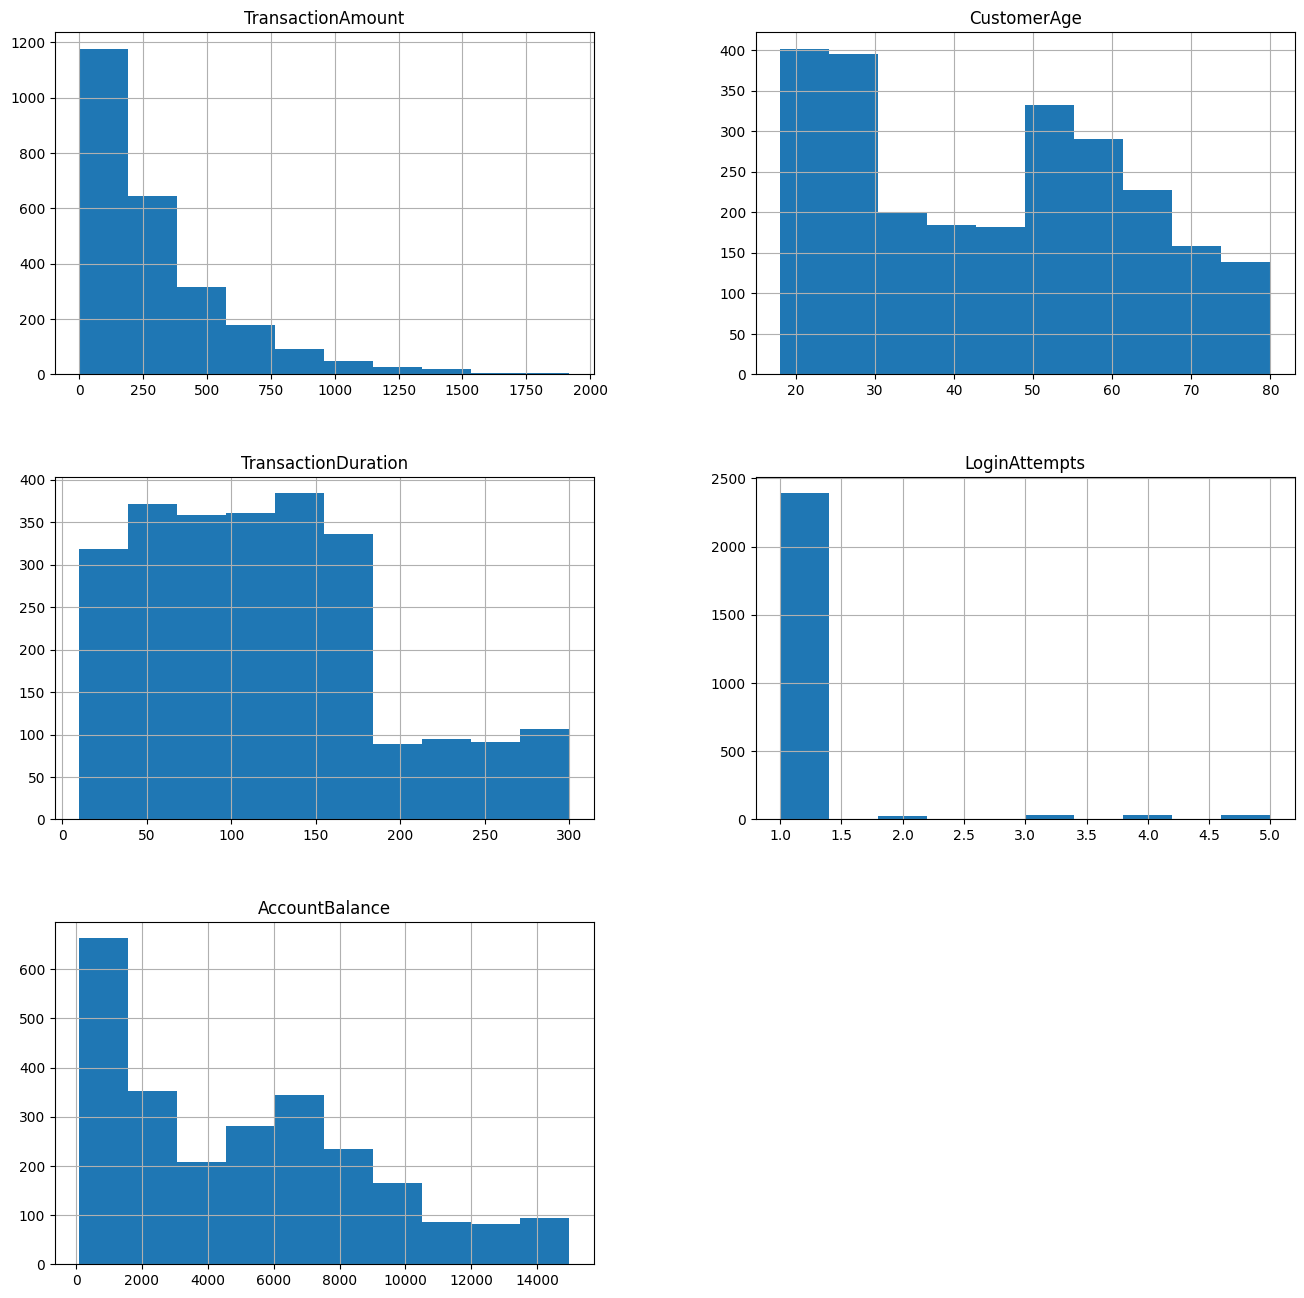

In [159]:
df.hist(figsize=(16,16))

In [160]:


# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)




Numerical Columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Categorical Columns: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


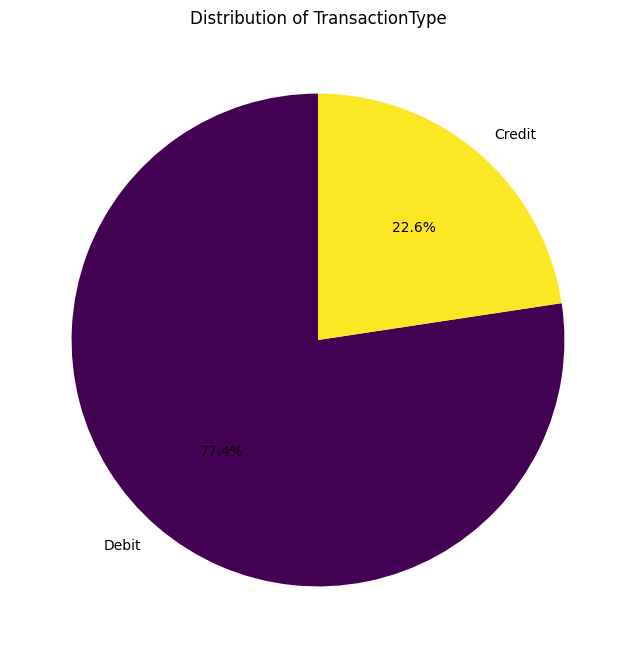

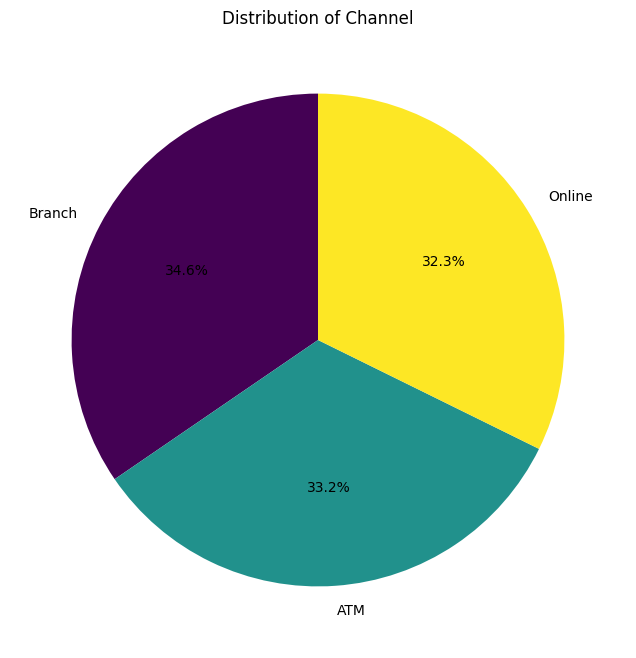

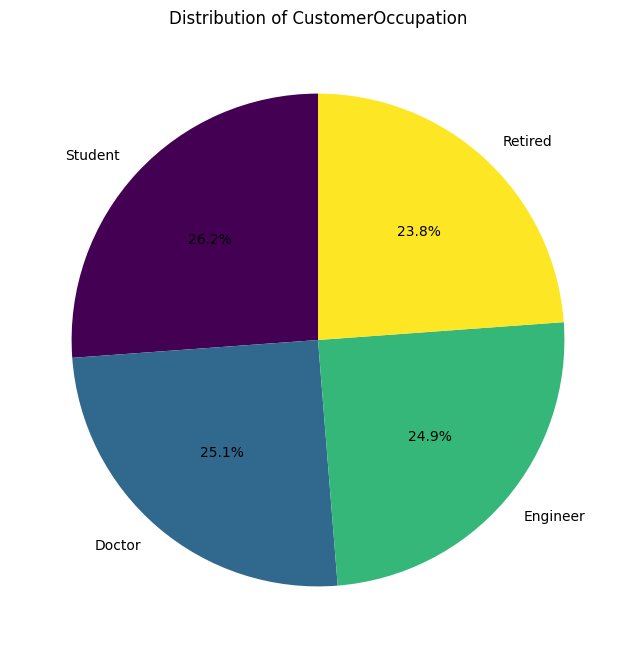

In [161]:
# Plot the distribution of categorical columns as pie charts
categorical_columns = ['TransactionType', 'Channel', 'CustomerOccupation']
for column in categorical_columns:
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Distribution of {column}')
    plt.ylabel('')  # Hide the y-label
    plt.show()


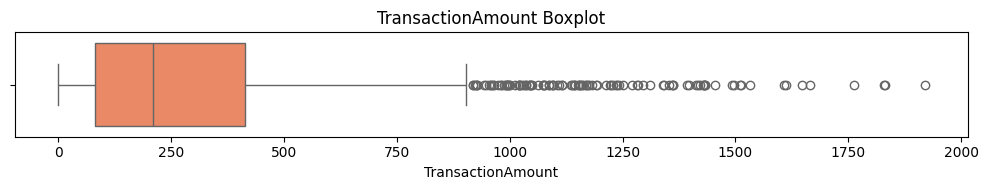


Summary Statistics for TransactionAmount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


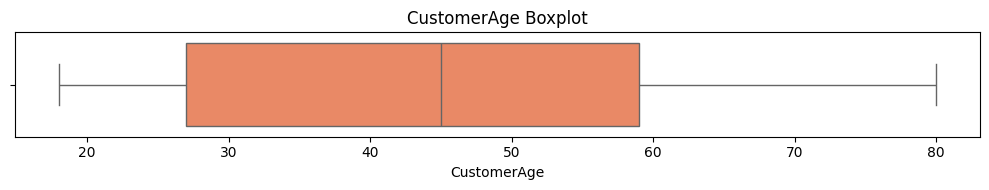


Summary Statistics for CustomerAge:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


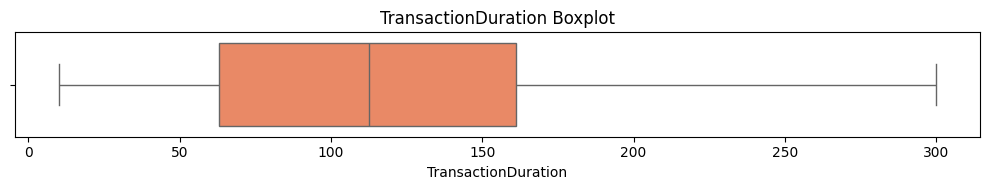


Summary Statistics for TransactionDuration:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


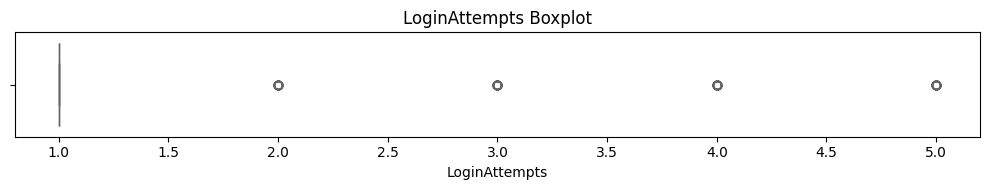


Summary Statistics for LoginAttempts:
 count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


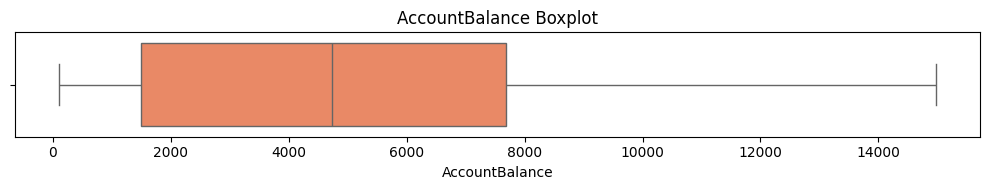


Summary Statistics for AccountBalance:
 count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64


In [162]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    # Create a boxplot with the specified color
    sns.boxplot(x=data[column], color='coral')  
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    # Print summary statistics for the specified column
    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

for column in numerical_columns:
    univariate_analysis(df, column, column.replace('_', ' '))



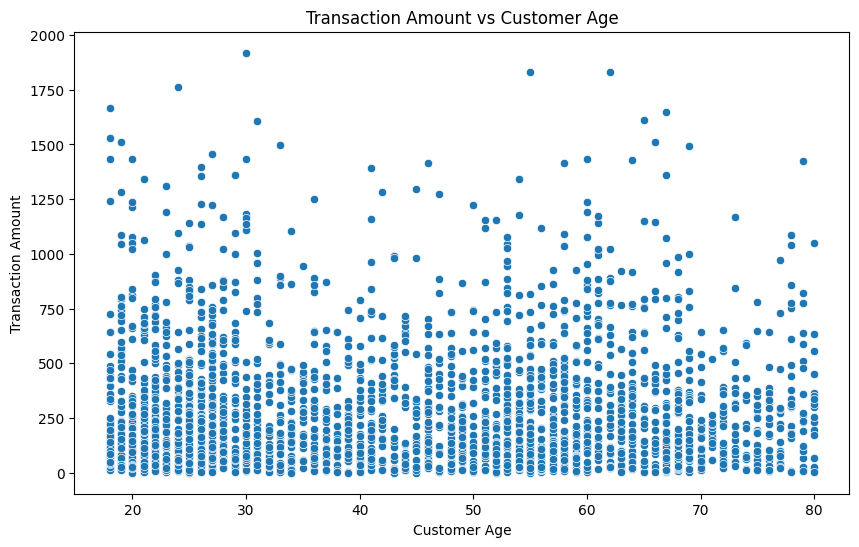

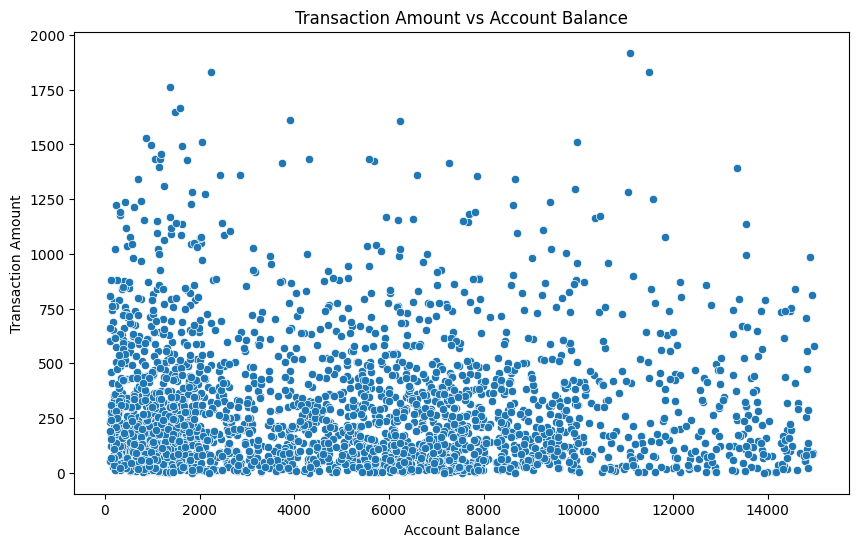

In [163]:
# 1. Analyze the relationship between TransactionAmount and CustomerAge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CustomerAge', y='TransactionAmount', data=df)
plt.title('Transaction Amount vs Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Transaction Amount')
plt.show()

# 2. Analyze the relationship between TransactionAmount and AccountBalance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AccountBalance', y='TransactionAmount', data=df)
plt.title('Transaction Amount vs Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.show()



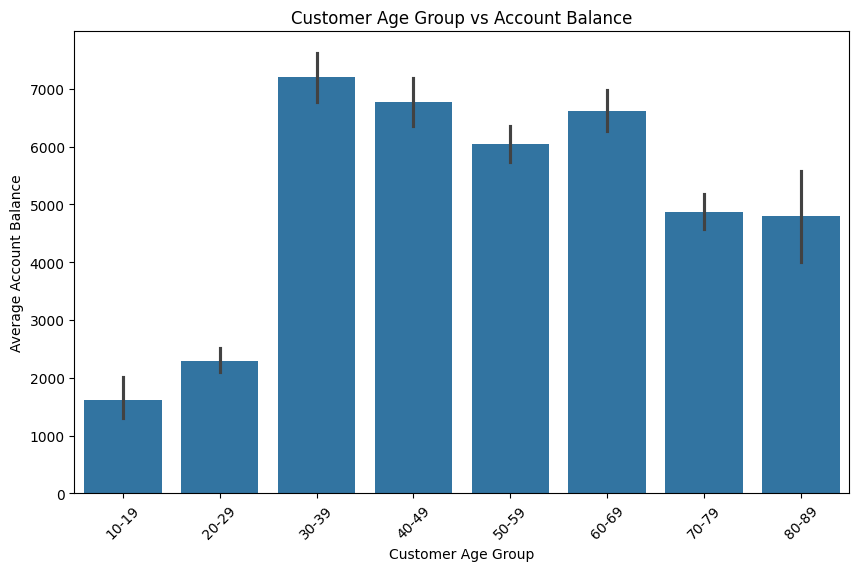

In [164]:
# Group the age into bins of 10 years
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=range(10, 91, 10), right=False, labels=[f'{i}-{i+9}' for i in range(10, 90, 10)])

plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='AccountBalance', data=df, estimator=np.mean)
plt.title('Customer Age Group vs Account Balance')
plt.xlabel('Customer Age Group')
plt.ylabel('Average Account Balance')
plt.xticks(rotation=45)
plt.show()

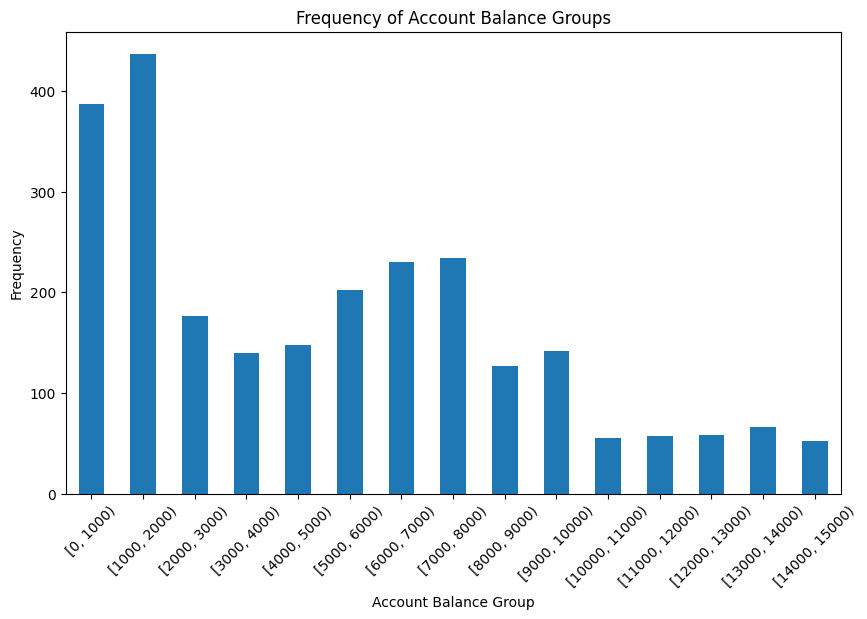

In [165]:
# Define the bins for AccountBalance
bins = range(0, int(df['AccountBalance'].max()) + 1000, 1000)

# Create a new column 'BalanceGroup' with the bins
df['BalanceGroup'] = pd.cut(df['AccountBalance'], bins=bins, right=False)

# Calculate the frequency of each bin
balance_group_frequency = df['BalanceGroup'].value_counts().sort_index()

# Display the frequency
plt.figure(figsize=(10, 6))
balance_group_frequency.plot(kind='bar')
plt.title('Frequency of Account Balance Groups')
plt.xlabel('Account Balance Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


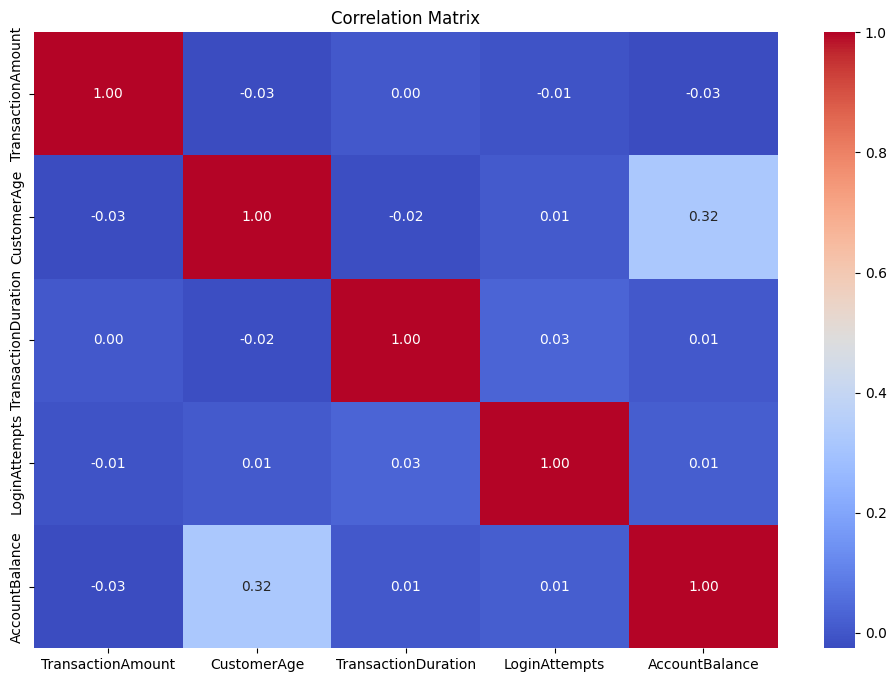

In [166]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [167]:
a = df.copy()

In [168]:
# 1. Menghapus atau Menangani Data Kosong (Missing Values)
df = df.dropna()

In [169]:
# 2. Menghapus Data Duplikat
df = df.drop_duplicates()

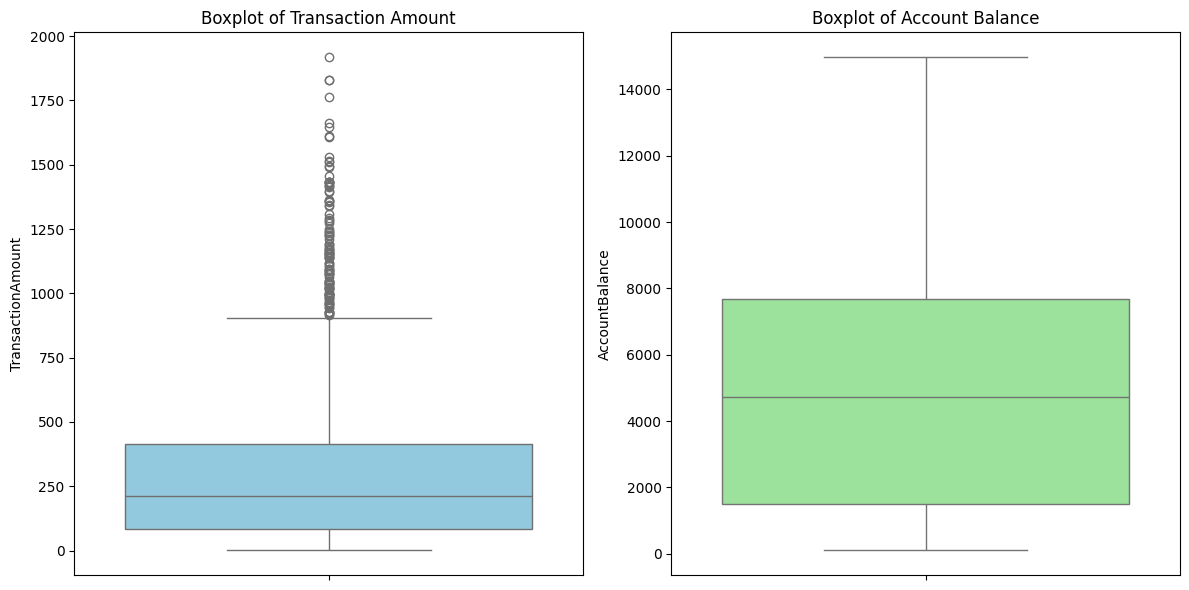

In [170]:
plt.figure(figsize=(12, 6))

# Boxplot for TransactionAmount
plt.subplot(1, 2, 1)
sns.boxplot(y=df['TransactionAmount'], color='skyblue')
plt.title('Boxplot of Transaction Amount')

# Boxplot for AccountBalance
plt.subplot(1, 2, 2)
sns.boxplot(y=df['AccountBalance'], color='lightgreen')
plt.title('Boxplot of Account Balance')

plt.tight_layout()
plt.show()

In [171]:
# Calculate Q1, Q3, and IQR
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
median = df['TransactionAmount'].median()
# Define the condition to filter out outliers
condition = ~((df['TransactionAmount'] < (Q1 - 1.5 * IQR)) | (df['TransactionAmount'] > (Q3 + 1.5 * IQR)))

# Filter the numeric features based on the condition
numeric_features = df.select_dtypes(include=['number']).columns
df_filtered_numeric = df.loc[condition, numeric_features]

# Combine with categorical features
categorical_features = df.select_dtypes(include=['object']).columns
df_filtered = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

In [172]:
# df_filtered['TransactionAmount'] = df['TransactionAmount'].apply(lambda x: (Q1 - 1.5 * IQR) if x < (Q1 - 1.5 * IQR) else (Q3 + 1.5 * IQR) if x > (Q3 + 1.5 * IQR) else x)

In [173]:
# df_filtered['TransactionAmount'] = df['TransactionAmount'].apply(lambda x: median if x < (Q1 - 1.5 * IQR) or x > (Q3 + 1.5 * IQR) else x)

In [174]:
df_filtered['TransactionAmount']

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2399, dtype: float64

In [175]:
df.shape, df_filtered.shape

((2512, 18), (2399, 16))

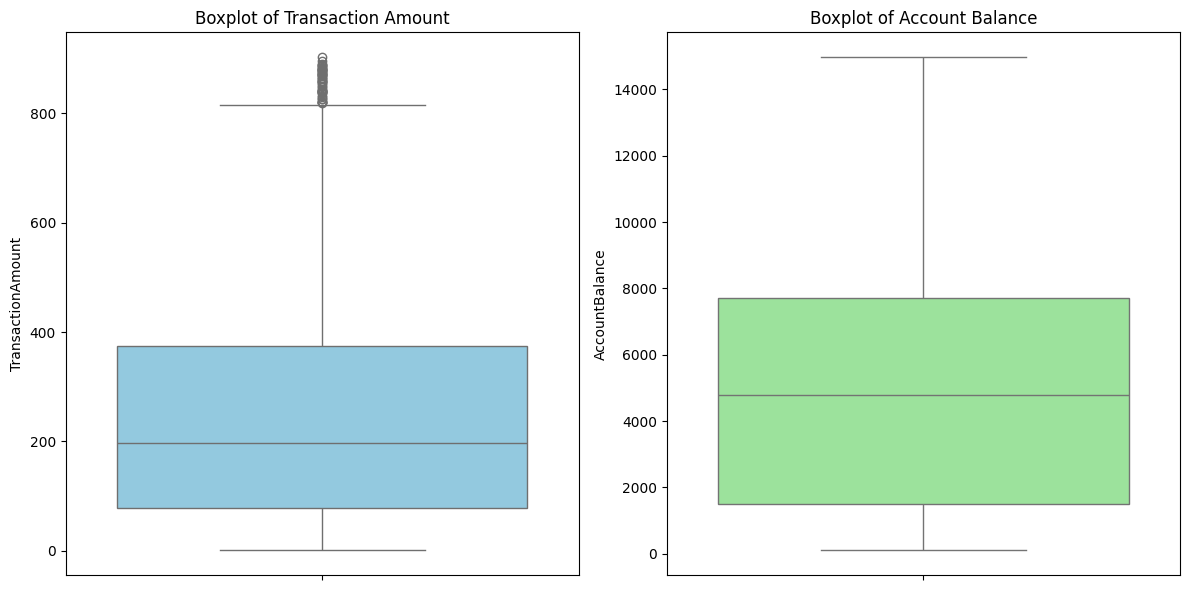

In [176]:
plt.figure(figsize=(12, 6))

# Boxplot for TransactionAmount
plt.subplot(1, 2, 1)
sns.boxplot(y=df_filtered['TransactionAmount'], color='skyblue')
plt.title('Boxplot of Transaction Amount')

# Boxplot for AccountBalance
plt.subplot(1, 2, 2)
sns.boxplot(y=df_filtered['AccountBalance'], color='lightgreen')
plt.title('Boxplot of Account Balance')

plt.tight_layout()
plt.show()

In [205]:
# 3. Normalisasi atau Standarisasi Fitur

scaler = StandardScaler()
numeric_columns = ['TransactionAmount', 'AccountBalance']
x = df_filtered[numeric_columns].copy()
x_scaled = scaler.fit_transform(x)

In [206]:
x_scaled.shape

(2399, 2)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [207]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
K = range(1, 10)  # Test for clusters from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

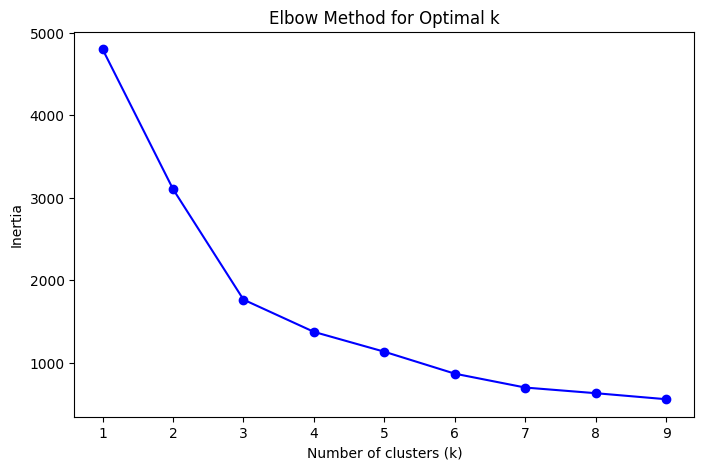

In [208]:


# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [209]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

# Elbow Method
sse = []
silhouette_scores = []
cluster_range = range(2, 11)

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(x_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f'Sillhouette Score: {silhouette_avg} for {num_clusters} clusters')

Sillhouette Score: 0.3800500012604558 for 2 clusters
Sillhouette Score: 0.423246036263481 for 3 clusters
Sillhouette Score: 0.41534438678535174 for 4 clusters
Sillhouette Score: 0.39565894501256577 for 5 clusters
Sillhouette Score: 0.42632217152854296 for 6 clusters
Sillhouette Score: 0.4213022439344598 for 7 clusters
Sillhouette Score: 0.4045550366280249 for 8 clusters
Sillhouette Score: 0.40963969692071295 for 9 clusters
Sillhouette Score: 0.40740900405699754 for 10 clusters


In [210]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
pca = PCA(n_components=2)
pca_components = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
pca_df['Cluster'] = kmeans.fit_predict(pca_components)

In [211]:
for num_clusters in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=num_clusters)
    labels = clustering.fit_predict(pca_components)
    silhouette_avg = silhouette_score(pca_components, labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Silhouette Score: {silhouette_avg} for {num_clusters} clusters')

Silhouette Score: 0.34090103856329695 for 2 clusters
Silhouette Score: 0.38143874908435654 for 3 clusters
Silhouette Score: 0.3419311330684838 for 4 clusters
Silhouette Score: 0.3350464917942742 for 5 clusters
Silhouette Score: 0.33913176921725585 for 6 clusters
Silhouette Score: 0.3438156911333354 for 7 clusters
Silhouette Score: 0.335130020169254 for 8 clusters
Silhouette Score: 0.34554273282520126 for 9 clusters
Silhouette Score: 0.34623374162057124 for 10 clusters


In [212]:

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(x_scaled)

# calculate silhouette score
silhouette_avg = silhouette_score(x_scaled, hierarchical_labels)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_avg}')

Silhouette Score for Agglomerative Clustering: 0.38143874908435654


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [185]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [220]:
df_filtered.reset_index(drop=True, inplace=True)
df_filtered

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate,Cluster,DistanceToCentroid
0,14.09,70,81,1,5112.21,TX000001,AC00128,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,Doctor,2024-11-04 08:08:08,0,1.017263
1,376.24,68,141,1,13758.91,TX000002,AC00455,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor,2024-11-04 08:09:35,1,1.556088
2,126.29,19,56,1,1122.35,TX000003,AC00019,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student,2024-11-04 08:07:04,0,0.305140
3,184.50,26,25,1,8569.06,TX000004,AC00070,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student,2024-11-04 08:09:06,1,0.122272
4,13.45,26,198,1,7429.40,TX000005,AC00411,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student,2024-11-04 08:06:39,1,0.819672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,856.21,33,109,1,12690.79,TX002508,AC00297,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,Doctor,2024-11-04 08:11:29,2,2.352900
2395,251.54,48,177,1,254.75,TX002509,AC00322,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,Doctor,2024-11-04 08:11:42,0,0.640863
2396,28.63,56,146,1,3382.91,TX002510,AC00095,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,Retired,2024-11-04 08:08:39,0,0.685928
2397,185.97,23,19,1,1776.91,TX002511,AC00118,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,Student,2024-11-04 08:12:22,0,0.150558


In [221]:
# Fit K-means with the chosen number of clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_scaled)

# Assign clusters and calculate distance to cluster centroid
df_filtered['Cluster'] = kmeans.labels_
df_filtered['DistanceToCentroid'] = np.linalg.norm(x_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Identify potential frauds based on distance threshold
threshold = df_filtered['DistanceToCentroid'].quantile(0.95)
potential_frauds = df_filtered[df_filtered['DistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds)

Number of potential frauds detected: 120


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate,Cluster,DistanceToCentroid
1,376.24,68,141,1,13758.91,TX000002,AC00455,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor,2024-11-04 08:09:35,1,1.556088
33,877.81,22,150,1,399.00,TX000034,AC00359,2023-03-13 17:23:24,Debit,Los Angeles,D000111,134.140.85.231,M094,Online,Student,2024-11-04 08:07:50,2,1.704620
34,255.26,45,50,1,14815.87,TX000035,AC00365,2023-10-27 16:42:49,Credit,San Francisco,D000357,92.214.76.157,M002,Branch,Doctor,2024-11-04 08:10:51,1,1.551770
41,34.02,38,19,1,14214.48,TX000042,AC00480,2023-01-09 16:13:21,Debit,Philadelphia,D000627,109.105.179.186,M046,Online,Doctor,2024-11-04 08:11:45,1,1.484134
52,85.43,67,145,1,14904.90,TX000053,AC00115,2023-06-07 16:45:34,Debit,Virginia Beach,D000235,194.174.252.1,M078,Branch,Doctor,2024-11-04 08:06:45,1,1.571777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,883.92,53,129,1,2342.64,TX002467,AC00251,2023-11-03 16:08:00,Credit,Tucson,D000058,117.67.192.211,M006,Online,Retired,2024-11-04 08:11:08,2,1.453485
2361,865.17,24,161,1,9297.50,TX002475,AC00302,2023-12-07 17:13:16,Debit,Houston,D000381,77.21.150.75,M009,Branch,Student,2024-11-04 08:10:13,2,1.690608
2380,856.90,36,150,1,8579.69,TX002494,AC00279,2023-03-17 16:10:35,Debit,New York,D000673,191.25.177.160,M088,Branch,Engineer,2024-11-04 08:09:52,2,1.540194
2389,603.54,44,26,1,10517.47,TX002503,AC00069,2023-04-21 16:22:38,Debit,Albuquerque,D000321,112.86.148.212,M029,Online,Doctor,2024-11-04 08:08:08,2,1.474907


In [222]:
x_scaled.shape, df_filtered.shape, potential_frauds.shape

((2399, 2), (2399, 18), (120, 18))

In [223]:
potential_frauds

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate,Cluster,DistanceToCentroid
1,376.24,68,141,1,13758.91,TX000002,AC00455,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor,2024-11-04 08:09:35,1,1.556088
33,877.81,22,150,1,399.00,TX000034,AC00359,2023-03-13 17:23:24,Debit,Los Angeles,D000111,134.140.85.231,M094,Online,Student,2024-11-04 08:07:50,2,1.704620
34,255.26,45,50,1,14815.87,TX000035,AC00365,2023-10-27 16:42:49,Credit,San Francisco,D000357,92.214.76.157,M002,Branch,Doctor,2024-11-04 08:10:51,1,1.551770
41,34.02,38,19,1,14214.48,TX000042,AC00480,2023-01-09 16:13:21,Debit,Philadelphia,D000627,109.105.179.186,M046,Online,Doctor,2024-11-04 08:11:45,1,1.484134
52,85.43,67,145,1,14904.90,TX000053,AC00115,2023-06-07 16:45:34,Debit,Virginia Beach,D000235,194.174.252.1,M078,Branch,Doctor,2024-11-04 08:06:45,1,1.571777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,883.92,53,129,1,2342.64,TX002467,AC00251,2023-11-03 16:08:00,Credit,Tucson,D000058,117.67.192.211,M006,Online,Retired,2024-11-04 08:11:08,2,1.453485
2361,865.17,24,161,1,9297.50,TX002475,AC00302,2023-12-07 17:13:16,Debit,Houston,D000381,77.21.150.75,M009,Branch,Student,2024-11-04 08:10:13,2,1.690608
2380,856.90,36,150,1,8579.69,TX002494,AC00279,2023-03-17 16:10:35,Debit,New York,D000673,191.25.177.160,M088,Branch,Engineer,2024-11-04 08:09:52,2,1.540194
2389,603.54,44,26,1,10517.47,TX002503,AC00069,2023-04-21 16:22:38,Debit,Albuquerque,D000321,112.86.148.212,M029,Online,Doctor,2024-11-04 08:08:08,2,1.474907


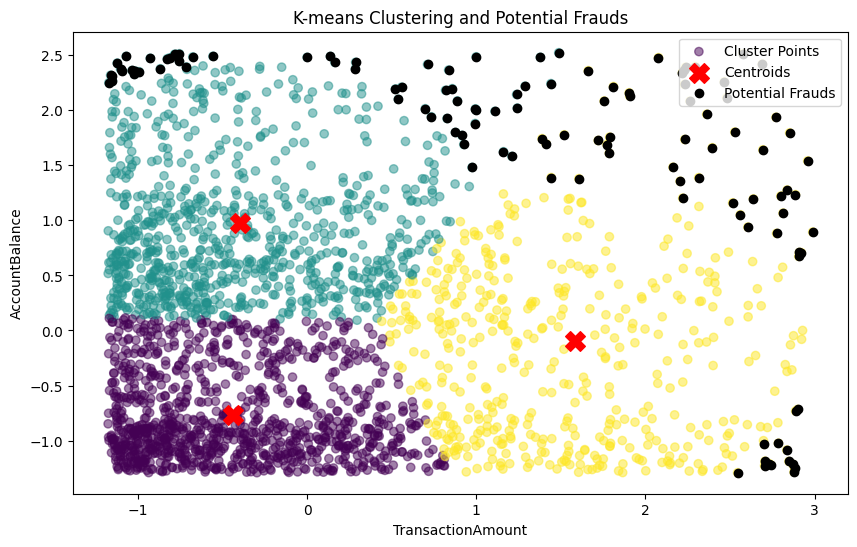

In [224]:
# Visualize clusters and potential frauds (2D plot for simplicity with legend)
plt.figure(figsize=(10, 6))

# Plotting clusters
scatter = plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Cluster Points')

# Plotting cluster centroids
centroids = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Plotting potential frauds
frauds = plt.scatter(x_scaled[potential_frauds.index, 0], x_scaled[potential_frauds.index, 1], c='black', label='Potential Frauds', edgecolors='k')

plt.xlabel(numeric_columns[0])
plt.ylabel(numeric_columns[1])
plt.title('K-means Clustering and Potential Frauds')
plt.legend(loc='upper right')
plt.show()

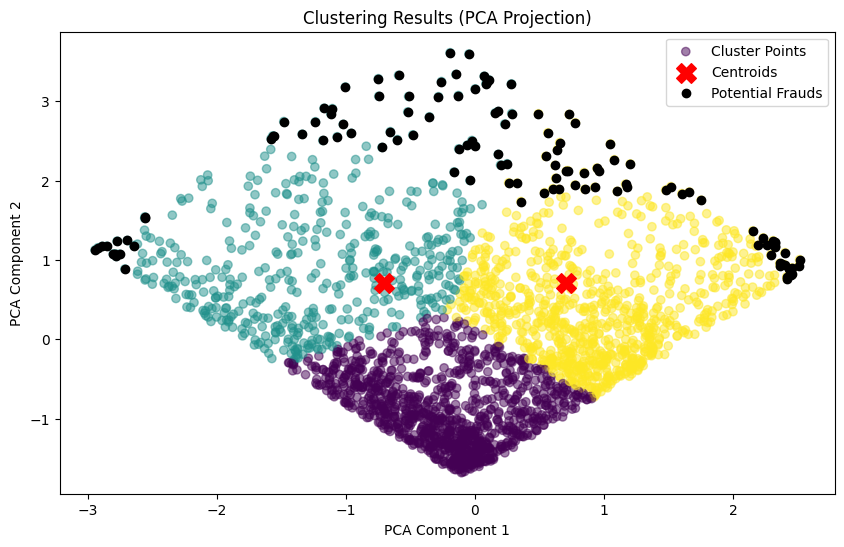

In [225]:
# Plot the PCA components with cluster labels and potential frauds
plt.figure(figsize=(10, 6))

# Plotting clusters
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5, label='Cluster Points')

# Plotting cluster centroids
centroids = plt.scatter(pca.components_[:, 0], pca.components_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Plotting potential frauds
frauds = plt.scatter(pca_df.loc[potential_frauds.index, 'PCA1'], pca_df.loc[potential_frauds.index, 'PCA2'], c='black', label='Potential Frauds', edgecolors='k')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Results (PCA Projection)')
plt.legend(loc='upper right')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.